Saving 9830f48aaf9779c18f35b66caa107eea.jpg to 9830f48aaf9779c18f35b66caa107eea (6).jpg


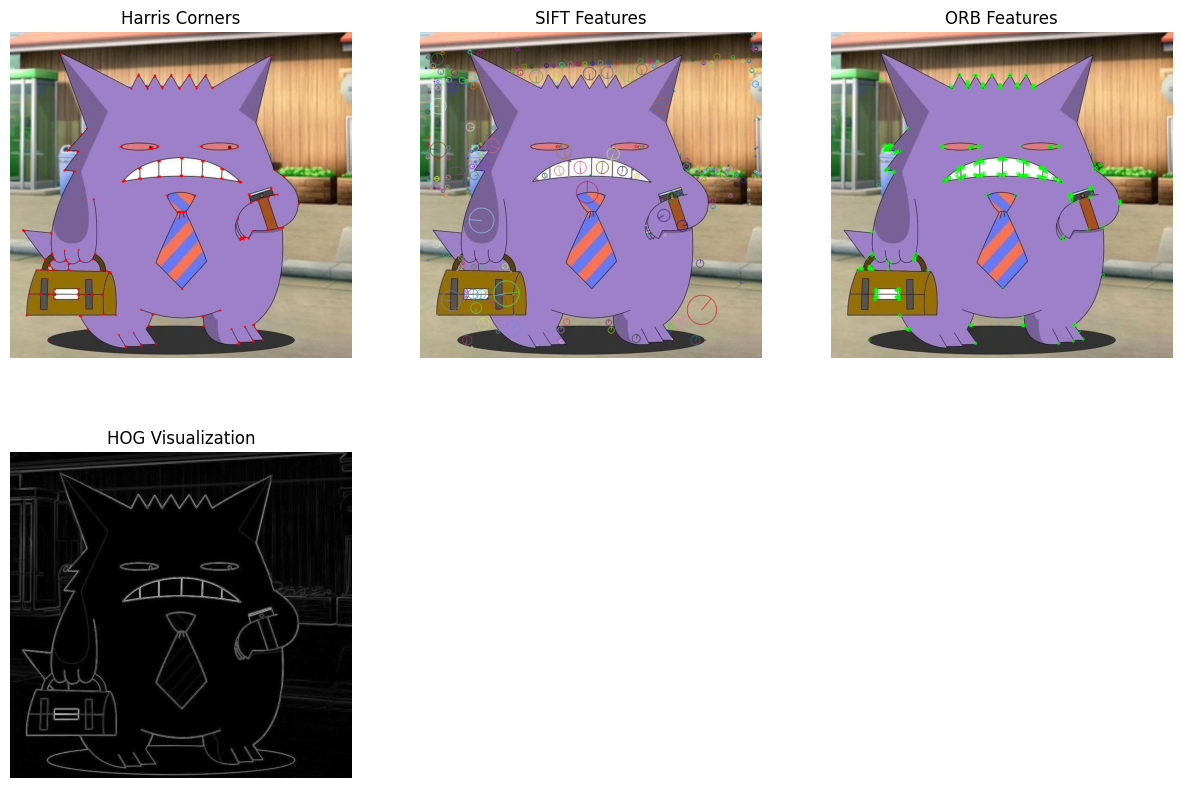

In [7]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# ==== Upload image ====
uploaded = files.upload()
for filename in uploaded.keys():
    img_path = filename

# Load image
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ---------- Harris Corner Detection ----------
def harris_detector(img, gray):
    gray_float = np.float32(gray)
    harris = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)
    harris = cv2.dilate(harris, None)
    img_harris = img.copy()
    img_harris[harris > 0.01 * harris.max()] = [0, 0, 255]  # red corners
    return img_harris

# ---------- SIFT ----------
def sift_detector(img, gray):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    img_sift = cv2.drawKeypoints(img, keypoints, None,
                                 flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return img_sift

# ---------- SURF ----------
# def surf_detector(img, gray):
#     # Requires opencv-contrib-python
#     surf = cv2.xfeatures2d.SURF_create(400)  # Hessian threshold
#     keypoints, descriptors = surf.detectAndCompute(gray, None)
#     img_surf = cv2.drawKeypoints(img, keypoints, None, (255, 0, 0), 4)
#     return img_surf

# ---------- ORB ----------
def orb_detector(img, gray):
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(gray, None)
    img_orb = cv2.drawKeypoints(img, keypoints, None, (0, 255, 0), flags=0)
    return img_orb

# ---------- HOG Descriptor ----------
def hog_descriptor(img, gray):
    hog = cv2.HOGDescriptor()
    h = hog.compute(gray)  # descriptor vector
    # Visualization: show gradient magnitudes
    grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = cv2.magnitude(grad_x, grad_y)
    img_hog = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    return img_hog.astype(np.uint8)

# ---------- Run all detectors ----------
results = {
    "Harris Corners": harris_detector(img, gray),
    "SIFT Features": sift_detector(img, gray),
    # "SURF Features": surf_detector(img, gray),
    "ORB Features": orb_detector(img, gray),
    "HOG Visualization": hog_descriptor(img, gray),
}

# ---------- Show results ----------
plt.figure(figsize=(15, 10))
for i, (title, result) in enumerate(results.items()):
    plt.subplot(2, 3, i + 1)
    if len(result.shape) == 2:  # grayscale
        plt.imshow(result, cmap="gray")
    else:
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
plt.show()